In [5]:
import os
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv

from model_activations.models.utils import load_full_identifier
from model_activations.models.configs import analysis_cfg as cfg
from plotting_tools import *

load_dotenv()
CACHE = os.getenv("CACHE")


In [9]:
DATASET = 'places_val'
NUM_COMPONENTS = 1000

In [18]:
# load expansion results
model_name = 'expansion'
identifier = load_full_identifier(model_name=model_name, 
                                            features=cfg[DATASET]['models'][model_name]['features'], 
                                            layers=cfg[DATASET]['models'][model_name]['layers'], 
                                            dataset=DATASET,
                                            principal_components = NUM_COMPONENTS)
with open(os.path.join(CACHE,'classification', identifier),'rb') as f:
    score_expansion_pcs = pickle.load(f)

# load alexnet results
model_name = 'alexnet'
identifier = load_full_identifier(model_name=model_name, 
                                            features=cfg[DATASET]['models'][model_name]['features'], 
                                            layers=cfg[DATASET]['models'][model_name]['layers'], 
                                            dataset=DATASET,
                                            principal_components = NUM_COMPONENTS)
with open(os.path.join(CACHE,'classification', identifier),'rb') as f:
    score_alexnet_pcs = pickle.load(f)

/tmp/ipykernel_278711/3774218801.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(x = ['Expansion Model','AlexNet'],


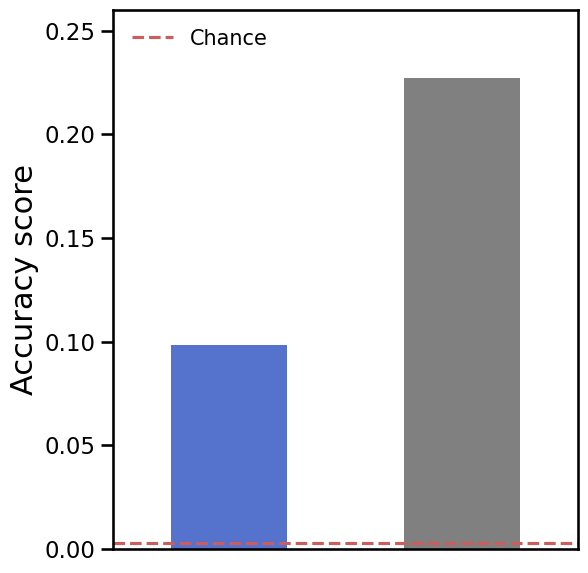

In [20]:
palette = {'Expansion Model':'royalblue','AlexNet':'gray'}

sns.set_context(context='talk')    
plt.rcParams['figure.figsize'] = (6,7)


ax1 = sns.barplot(x = ['Expansion Model','AlexNet'], 
                  y = [score_expansion_pcs, 
                       score_alexnet_pcs], 
                       palette=palette,
                       width=0.5, 
                       dodge=False)            
plt.axhline(y=1/365, color='indianred', linestyle='--', label='Chance')
    
ax1.legend(frameon=False,fontsize=15,loc='upper left')  #else ax1.legend_.remove()
plt.xlabel('')
plt.ylim(0,0.26)
plt.ylabel(size=22, ylabel='Accuracy score')    
ax1.set_xticks([])
plt.savefig(f'manuscript_figures/figure_6.png', dpi=200) 
plt.show()